In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

## Part B


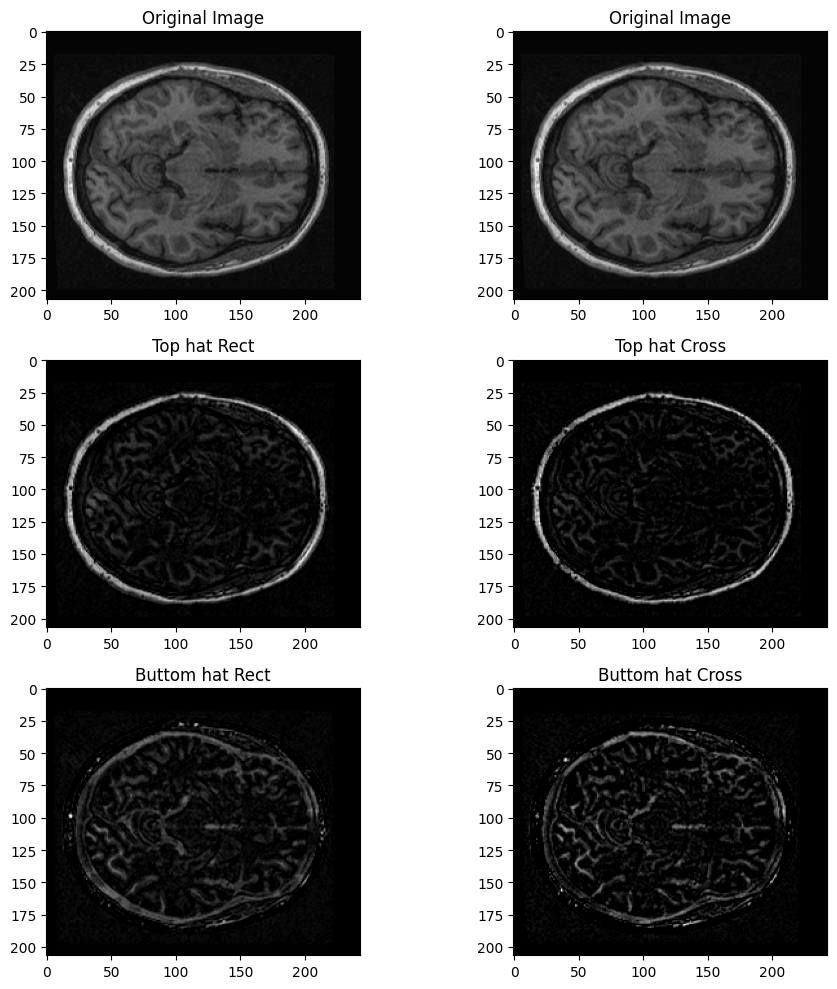

In [3]:
MRI_Img=cv.imread('mri_low_contrast.png',0)
Top_hat_Rect= MRI_Img -  cv.morphologyEx(MRI_Img, cv.MORPH_OPEN,	cv.getStructuringElement(cv.MORPH_RECT,ksize=(7,7)))
Top_hat_Cross= MRI_Img -  cv.morphologyEx(MRI_Img, cv.MORPH_OPEN,	cv.getStructuringElement(cv.MORPH_CROSS,ksize=(7,7)))
ButtomTop_hat_Rect=  cv.morphologyEx(MRI_Img, cv.MORPH_CLOSE,	cv.getStructuringElement(cv.MORPH_RECT,ksize=(7,7))) - MRI_Img
ButtomTop_hat_Cross=  cv.morphologyEx(MRI_Img, cv.MORPH_CLOSE,	cv.getStructuringElement(cv.MORPH_CROSS,ksize=(7,7))) - MRI_Img
plt.figure(figsize=(10,10))
plt.subplot(3,2,1)
plt.imshow(MRI_Img,cmap='gray')
plt.title('Original Image')
plt.subplot(3,2,2)
plt.imshow(MRI_Img, cmap='gray')
plt.title('Original Image')
plt.subplot(3,2,3)
plt.imshow(Top_hat_Rect,cmap='gray')
plt.title('Top hat Rect')
plt.subplot(3,2,4)
plt.imshow(Top_hat_Cross,cmap='gray')
plt.title('Top hat Cross')
plt.subplot(3,2,5)
plt.imshow(ButtomTop_hat_Rect,cmap='gray')
plt.title('Buttom hat Rect')
plt.subplot(3,2,6)
plt.imshow(ButtomTop_hat_Cross,cmap='gray')
plt.title('Buttom hat Cross')
plt.tight_layout()
plt.show()

## Part C


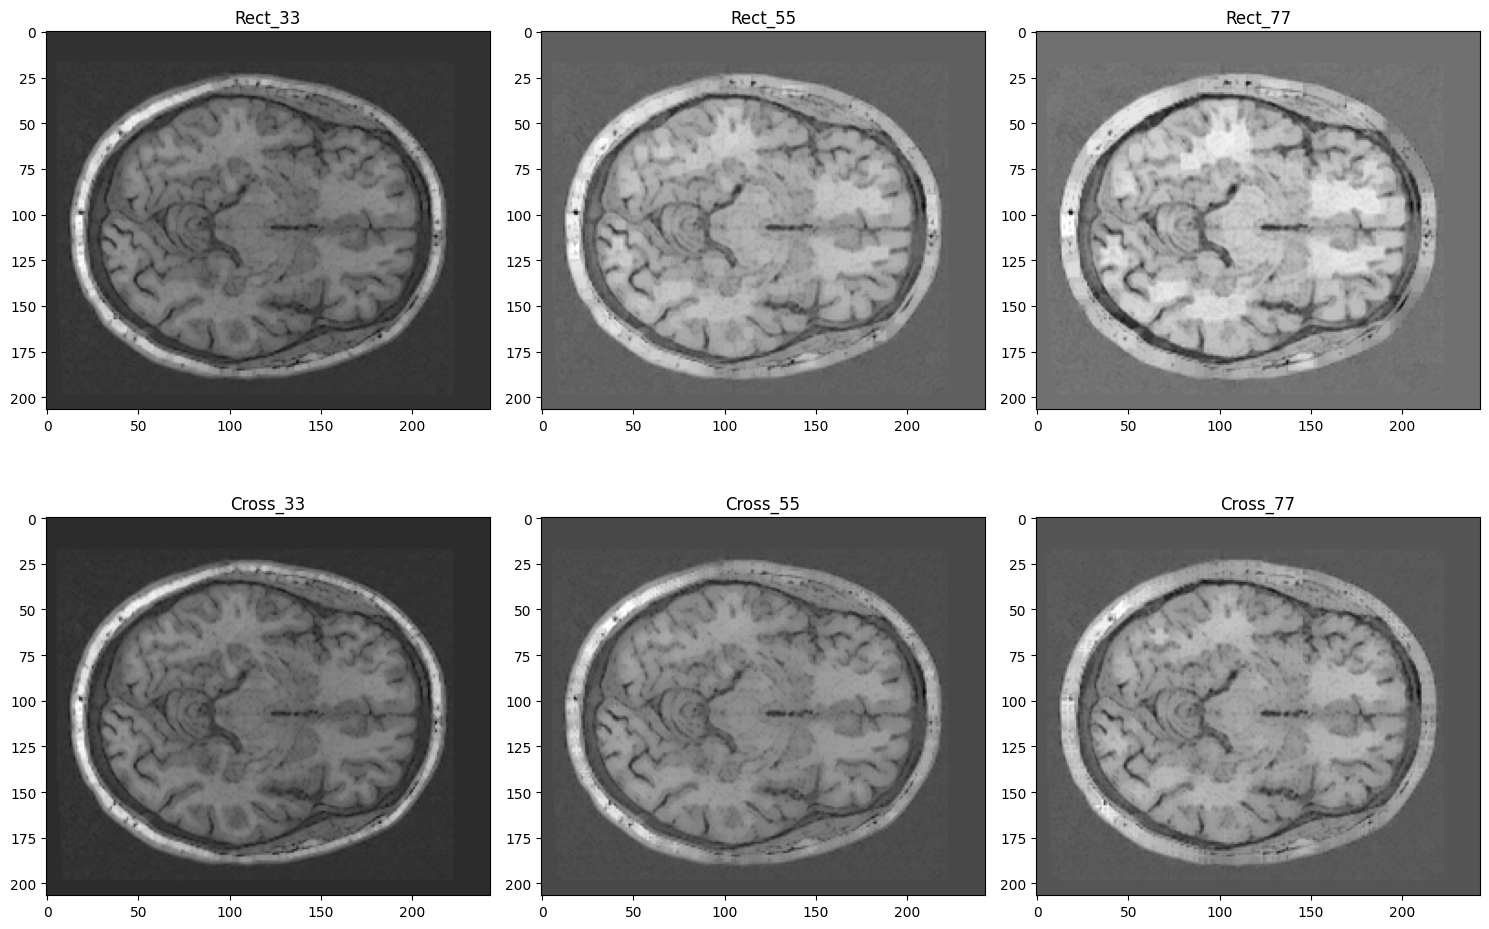

In [4]:
Rect_33 = (    MRI_Img +  cv.morphologyEx(MRI_Img, cv.MORPH_OPEN,	cv.getStructuringElement(cv.MORPH_RECT,ksize=(3,3))) - 
    cv.morphologyEx(MRI_Img, cv.MORPH_CLOSE,	cv.getStructuringElement(cv.MORPH_RECT,ksize=(3,3)))    )
Rect_55= (    MRI_Img +  cv.morphologyEx(MRI_Img, cv.MORPH_OPEN,	cv.getStructuringElement(cv.MORPH_RECT,ksize=(5,5))) - 
    cv.morphologyEx(MRI_Img, cv.MORPH_CLOSE,	cv.getStructuringElement(cv.MORPH_RECT,ksize=(5,5)))    )
Rect_77= (    MRI_Img +  cv.morphologyEx(MRI_Img, cv.MORPH_OPEN,	cv.getStructuringElement(cv.MORPH_RECT,ksize=(7,7))) - 
    cv.morphologyEx(MRI_Img, cv.MORPH_CLOSE,	cv.getStructuringElement(cv.MORPH_RECT,ksize=(7,7)))    )


Cross_33 = (    MRI_Img +  cv.morphologyEx(MRI_Img, cv.MORPH_OPEN,	cv.getStructuringElement(cv.MORPH_CROSS,ksize=(3,3))) - 
    cv.morphologyEx(MRI_Img, cv.MORPH_CLOSE,	cv.getStructuringElement(cv.MORPH_CROSS,ksize=(3,3)))    )
Cross_55= (    MRI_Img +  cv.morphologyEx(MRI_Img, cv.MORPH_OPEN,	cv.getStructuringElement(cv.MORPH_CROSS,ksize=(5,5))) - 
    cv.morphologyEx(MRI_Img, cv.MORPH_CLOSE,	cv.getStructuringElement(cv.MORPH_CROSS,ksize=(5,5)))    )
Cross_77= (    MRI_Img +  cv.morphologyEx(MRI_Img, cv.MORPH_OPEN,	cv.getStructuringElement(cv.MORPH_CROSS,ksize=(7,7))) - 
    cv.morphologyEx(MRI_Img, cv.MORPH_CLOSE,	cv.getStructuringElement(cv.MORPH_CROSS,ksize=(7,7)))    )


plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(Rect_33, cmap='gray')
plt.title('Rect_33')


plt.subplot(2, 3, 2)
plt.imshow(Rect_55, cmap='gray')
plt.title('Rect_55')

plt.subplot(2, 3, 3)
plt.imshow(Rect_77, cmap='gray')
plt.title('Rect_77')

plt.subplot(2, 3, 4)
plt.imshow(Cross_33, cmap='gray')
plt.title('Cross_33')

plt.subplot(2, 3, 5)
plt.imshow(Cross_55, cmap='gray')
plt.title('Cross_55')

plt.subplot(2, 3, 6)
plt.imshow(Cross_77, cmap='gray')
plt.title('Cross_77')

plt.tight_layout()
plt.show()




## Part D


In [5]:
def CIR(Original_img,Transformed_img):
    Original_img_padded=np.pad(Original_img,3)
    Transformed_img_padded=np.pad(Transformed_img,3)
    X_start=3
    X_end=Original_img.shape[0]
    Y_start=3
    Y_end=Original_img.shape[1]
    CIR_Nom=0
    CIR_Den=0
    for i in range(X_start,X_end+1):
        for j in range(Y_start,Y_end+1):
                A_kernel_Org=Original_img_padded[i-1:i+2,j-1:j+2]
                P_kernel_Org=Original_img_padded[i-3:i+4,j-3:j+4]
                A_kernel_Tr=Transformed_img_padded[i-1:i+2,j-1:j+2]
                P_kernel_Tr=Transformed_img_padded[i-3:i+4,j-3:j+4]
                C_org = (np.abs(np.mean(P_kernel_Org)-np.mean(A_kernel_Org)))/np.abs(np.mean(P_kernel_Org)+np.mean(A_kernel_Org))
                C_Tr = (np.abs(np.mean(P_kernel_Tr)-np.mean(A_kernel_Tr)))/np.abs(np.mean(P_kernel_Tr)+np.mean(A_kernel_Tr))
                CIR_Nom+=(C_Tr - C_org)**2
                CIR_Den+=(C_org)**2

    return (CIR_Nom/CIR_Den)


## Part H

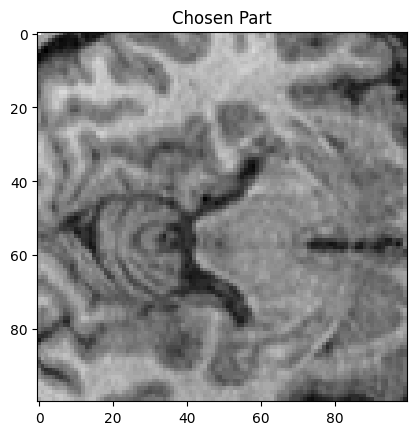

In [6]:
X_Start=50
X_end=150
Y_Start=50
Y_end=150
plt.imshow(MRI_Img[X_Start:X_end,Y_Start:Y_end],cmap='gray')
plt.title("Chosen Part")
plt.show()

In [7]:
CIR_Rect33 = CIR(MRI_Img[X_Start:X_end,Y_Start:Y_end], Rect_33[X_Start:X_end,Y_Start:Y_end])
CIR_Rect55 = CIR(MRI_Img[X_Start:X_end,Y_Start:Y_end], Rect_55[X_Start:X_end,Y_Start:Y_end])
CIR_Rect77 = CIR(MRI_Img[X_Start:X_end,Y_Start:Y_end], Rect_77[X_Start:X_end,Y_Start:Y_end])
CIR_Cross33 = CIR(MRI_Img[X_Start:X_end,Y_Start:Y_end], Cross_33[X_Start:X_end,Y_Start:Y_end])
CIR_Cross55 = CIR(MRI_Img[X_Start:X_end,Y_Start:Y_end], Cross_55[X_Start:X_end,Y_Start:Y_end])
CIR_Cross77 = CIR(MRI_Img[X_Start:X_end,Y_Start:Y_end], Cross_77[X_Start:X_end,Y_Start:Y_end])
print("CIR_Rect33:", CIR_Rect33)
print("CIR_Rect55:", CIR_Rect55)
print("CIR_Rect77:", CIR_Rect77)
print("CIR_Cross33:", CIR_Cross33)
print("CIR_Cross55:", CIR_Cross55)
print("CIR_Cross77:", CIR_Cross77)

CIR_Rect33: 0.017964908779496868
CIR_Rect55: 0.053630060459892
CIR_Rect77: 0.07540210110178865
CIR_Cross33: 0.00864839461932781
CIR_Cross55: 0.03333593457291769
CIR_Cross77: 0.052412781762526096


In [16]:
Rect_Structure_1=cv.getStructuringElement(cv.MORPH_RECT,ksize=(3,3))
structuring_element = cv.getStructuringElement(cv.MORPH_CROSS, (3,3))
flag=0
CIR_Rect_F = 0
i = 1
Rect_Structure=np.ones([3,3])

while True:

    Rect_Con = (    MRI_Img[X_Start:X_end,Y_Start:Y_end] +  cv.morphologyEx(MRI_Img[X_Start:X_end,Y_Start:Y_end], cv.MORPH_OPEN,	Rect_Structure) -
                 cv.morphologyEx(MRI_Img[X_Start:X_end,Y_Start:Y_end], cv.MORPH_CLOSE,	Rect_Structure) )
    CIR_Rect = CIR(MRI_Img[X_Start:X_end,Y_Start:Y_end] , Rect_Con)
    if CIR_Rect==CIR_Rect_F:
        break;
    
    CIR_Rect_F = CIR_Rect

    kernel_size= 3+2*i
    center = kernel_size // 2
    start_index = center - ((kernel_size-2) // 2 )
    end_index = center + ((kernel_size-2) // 2 + 1)

    Rect_Structure = np.zeros([kernel_size,kernel_size],dtype=np.uint8)

    Rect_Structure[start_index:end_index, start_index:end_index] = Rect_Structure_1
    Rect_Structure = cv.morphologyEx(Rect_Structure, cv.MORPH_DILATE, structuring_element)
    Rect_Structure_1 = Rect_Structure
    i+=1

print(CIR_Rect_F)
print(i)
print(Rect_Structure.shape)


0.04426421790911727
46
(93, 93)


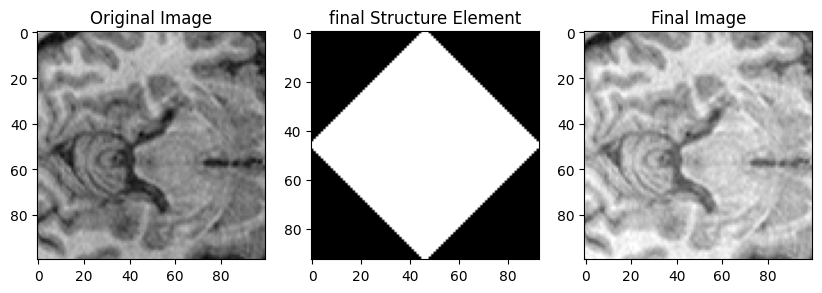

In [17]:
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(MRI_Img[X_Start:X_end,Y_Start:Y_end],cmap='gray')
plt.title('Original Image')
plt.subplot(1,3,2)
plt.imshow(Rect_Structure,cmap='gray')
plt.title('final Structure Element')
plt.subplot(1,3,3)
plt.imshow(Rect_Con,cmap='gray')
plt.title('Final Image')
plt.show()

In [135]:
Rect_Structure_1=cv.getStructuringElement(cv.MORPH_CROSS,ksize=(3,3))
structuring_element = cv.getStructuringElement(cv.MORPH_CROSS, (3,3))
flag=0
CIR_Rect_F = 0
i = 1
Rect_Structure=np.ones([3,3])

while True:

    Rect_Con = (    MRI_Img[X_Start:X_end,Y_Start:Y_end] +  cv.morphologyEx(MRI_Img[X_Start:X_end,Y_Start:Y_end], cv.MORPH_OPEN,	Rect_Structure) -
                 cv.morphologyEx(MRI_Img[X_Start:X_end,Y_Start:Y_end], cv.MORPH_CLOSE,	Rect_Structure) )
    CIR_Rect = CIR(MRI_Img[X_Start:X_end,Y_Start:Y_end] , Rect_Con,)
    if CIR_Rect==CIR_Rect_F:
        break;
    
    CIR_Rect_F = CIR_Rect

    kernel_size= 3+2*i
    center = kernel_size // 2
    start_index = center - ((kernel_size-2) // 2 )
    end_index = center + ((kernel_size-2) // 2 + 1)

    Rect_Structure = np.zeros([kernel_size,kernel_size],dtype=np.uint8)

    Rect_Structure[start_index:end_index, start_index:end_index] = Rect_Structure_1
    Rect_Structure = cv.morphologyEx(Rect_Structure, cv.MORPH_DILATE, structuring_element)
    Rect_Structure_1 = Rect_Structure
    i+=1

print(CIR_Rect_F)
print(i)
print(Rect_Structure.shape)


0.04410501729002985
47
(95, 95)


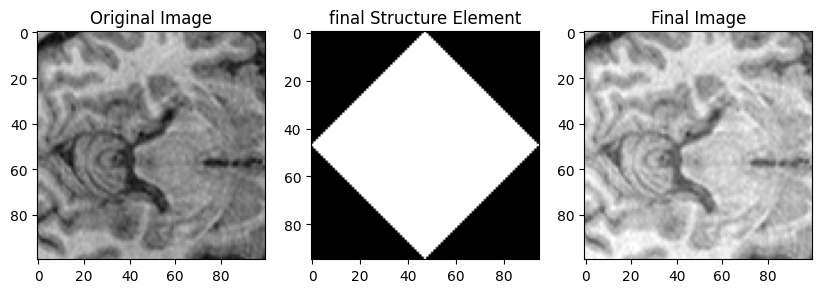

In [136]:
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(MRI_Img[X_Start:X_end,Y_Start:Y_end],cmap='gray')
plt.title('Original Image')
plt.subplot(1,3,2)
plt.imshow(Rect_Structure,cmap='gray')
plt.title('final Structure Element')
plt.subplot(1,3,3)
plt.imshow(Rect_Con,cmap='gray')
plt.title('Final Image')
plt.show()

In [131]:
Rect_Structure_1=cv.getStructuringElement(cv.MORPH_CROSS,ksize=(3,3))
structuring_element = cv.getStructuringElement(cv.MORPH_RECT, (3,3))
flag=0
CIR_Rect_F = 0
i = 1
Rect_Structure=np.ones([3,3])

while True:

    Rect_Con = (    MRI_Img[X_Start:X_end,Y_Start:Y_end] +  cv.morphologyEx(MRI_Img[X_Start:X_end,Y_Start:Y_end], cv.MORPH_OPEN,	Rect_Structure) -
                 cv.morphologyEx(MRI_Img[X_Start:X_end,Y_Start:Y_end], cv.MORPH_CLOSE,	Rect_Structure) )
    CIR_Rect = CIR(MRI_Img[X_Start:X_end,Y_Start:Y_end] , Rect_Con)
    if CIR_Rect==CIR_Rect_F:
        break;
    
    CIR_Rect_F = CIR_Rect

    kernel_size= 3+2*i
    center = kernel_size // 2
    start_index = center - ((kernel_size-2) // 2 )
    end_index = center + ((kernel_size-2) // 2 + 1)

    Rect_Structure = np.zeros([kernel_size,kernel_size],dtype=np.uint8)

    Rect_Structure[start_index:end_index, start_index:end_index] = Rect_Structure_1
    Rect_Structure = cv.morphologyEx(Rect_Structure, cv.MORPH_DILATE, structuring_element)
    Rect_Structure_1 = Rect_Structure
    i+=1

print(CIR_Rect_F)
print(i)
print(Rect_Structure.shape)


0.04841924022960749
47
(95, 95)


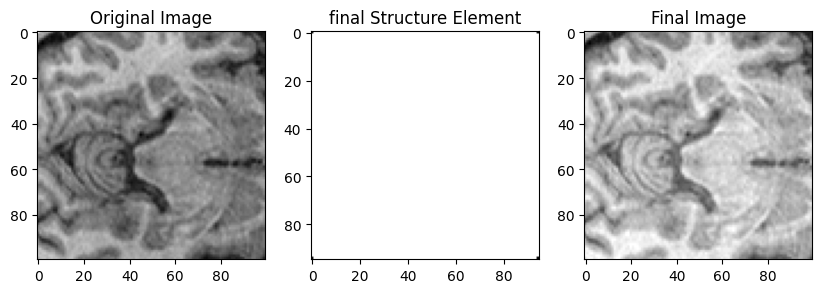

In [132]:
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(MRI_Img[X_Start:X_end,Y_Start:Y_end],cmap='gray')
plt.title('Original Image')
plt.subplot(1,3,2)
plt.imshow(Rect_Structure,cmap='gray')
plt.title('final Structure Element')
plt.subplot(1,3,3)
plt.imshow(Rect_Con,cmap='gray')
plt.title('Final Image')
plt.show()